# DL Project on Loan_Prediction.csv 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense 
from sklearn.metrics import classification_report 

In [2]:
df = pd.read_csv('Loan_Train.csv')

## EDA:

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Data Cleaning and Preprocessing:

- Column Loan_ID, we can drop, as it will not help 
predicting Target.

In [5]:
df.drop(columns='Loan_ID',axis=1, inplace=True)

- Now we have 12 columns in our dataframe.
- In dependent column, values are numeric but datatype is showing Object. So, lets check the unique values it has. 

In [6]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

- We can see here 3+ is not numeric value. So lets change this value to 3 and change the datatype of column to float.

In [7]:
df.replace({"Dependents":{'3+':3},"Loan_Status":{'Y':1,'N':0}},inplace=True)

In [8]:
df['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [9]:
df['Dependents'].dtype

dtype('O')

In [10]:
df['Dependents'] = df['Dependents'].astype('float')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    float64
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 57.7+ KB


In [12]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [13]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


In [14]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
df.isna().sum()/df.shape[0]*100

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [16]:
df.corr()['Loan_Status']

Dependents           0.006781
ApplicantIncome     -0.004710
CoapplicantIncome   -0.059187
LoanAmount          -0.037318
Loan_Amount_Term    -0.021268
Credit_History       0.561678
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

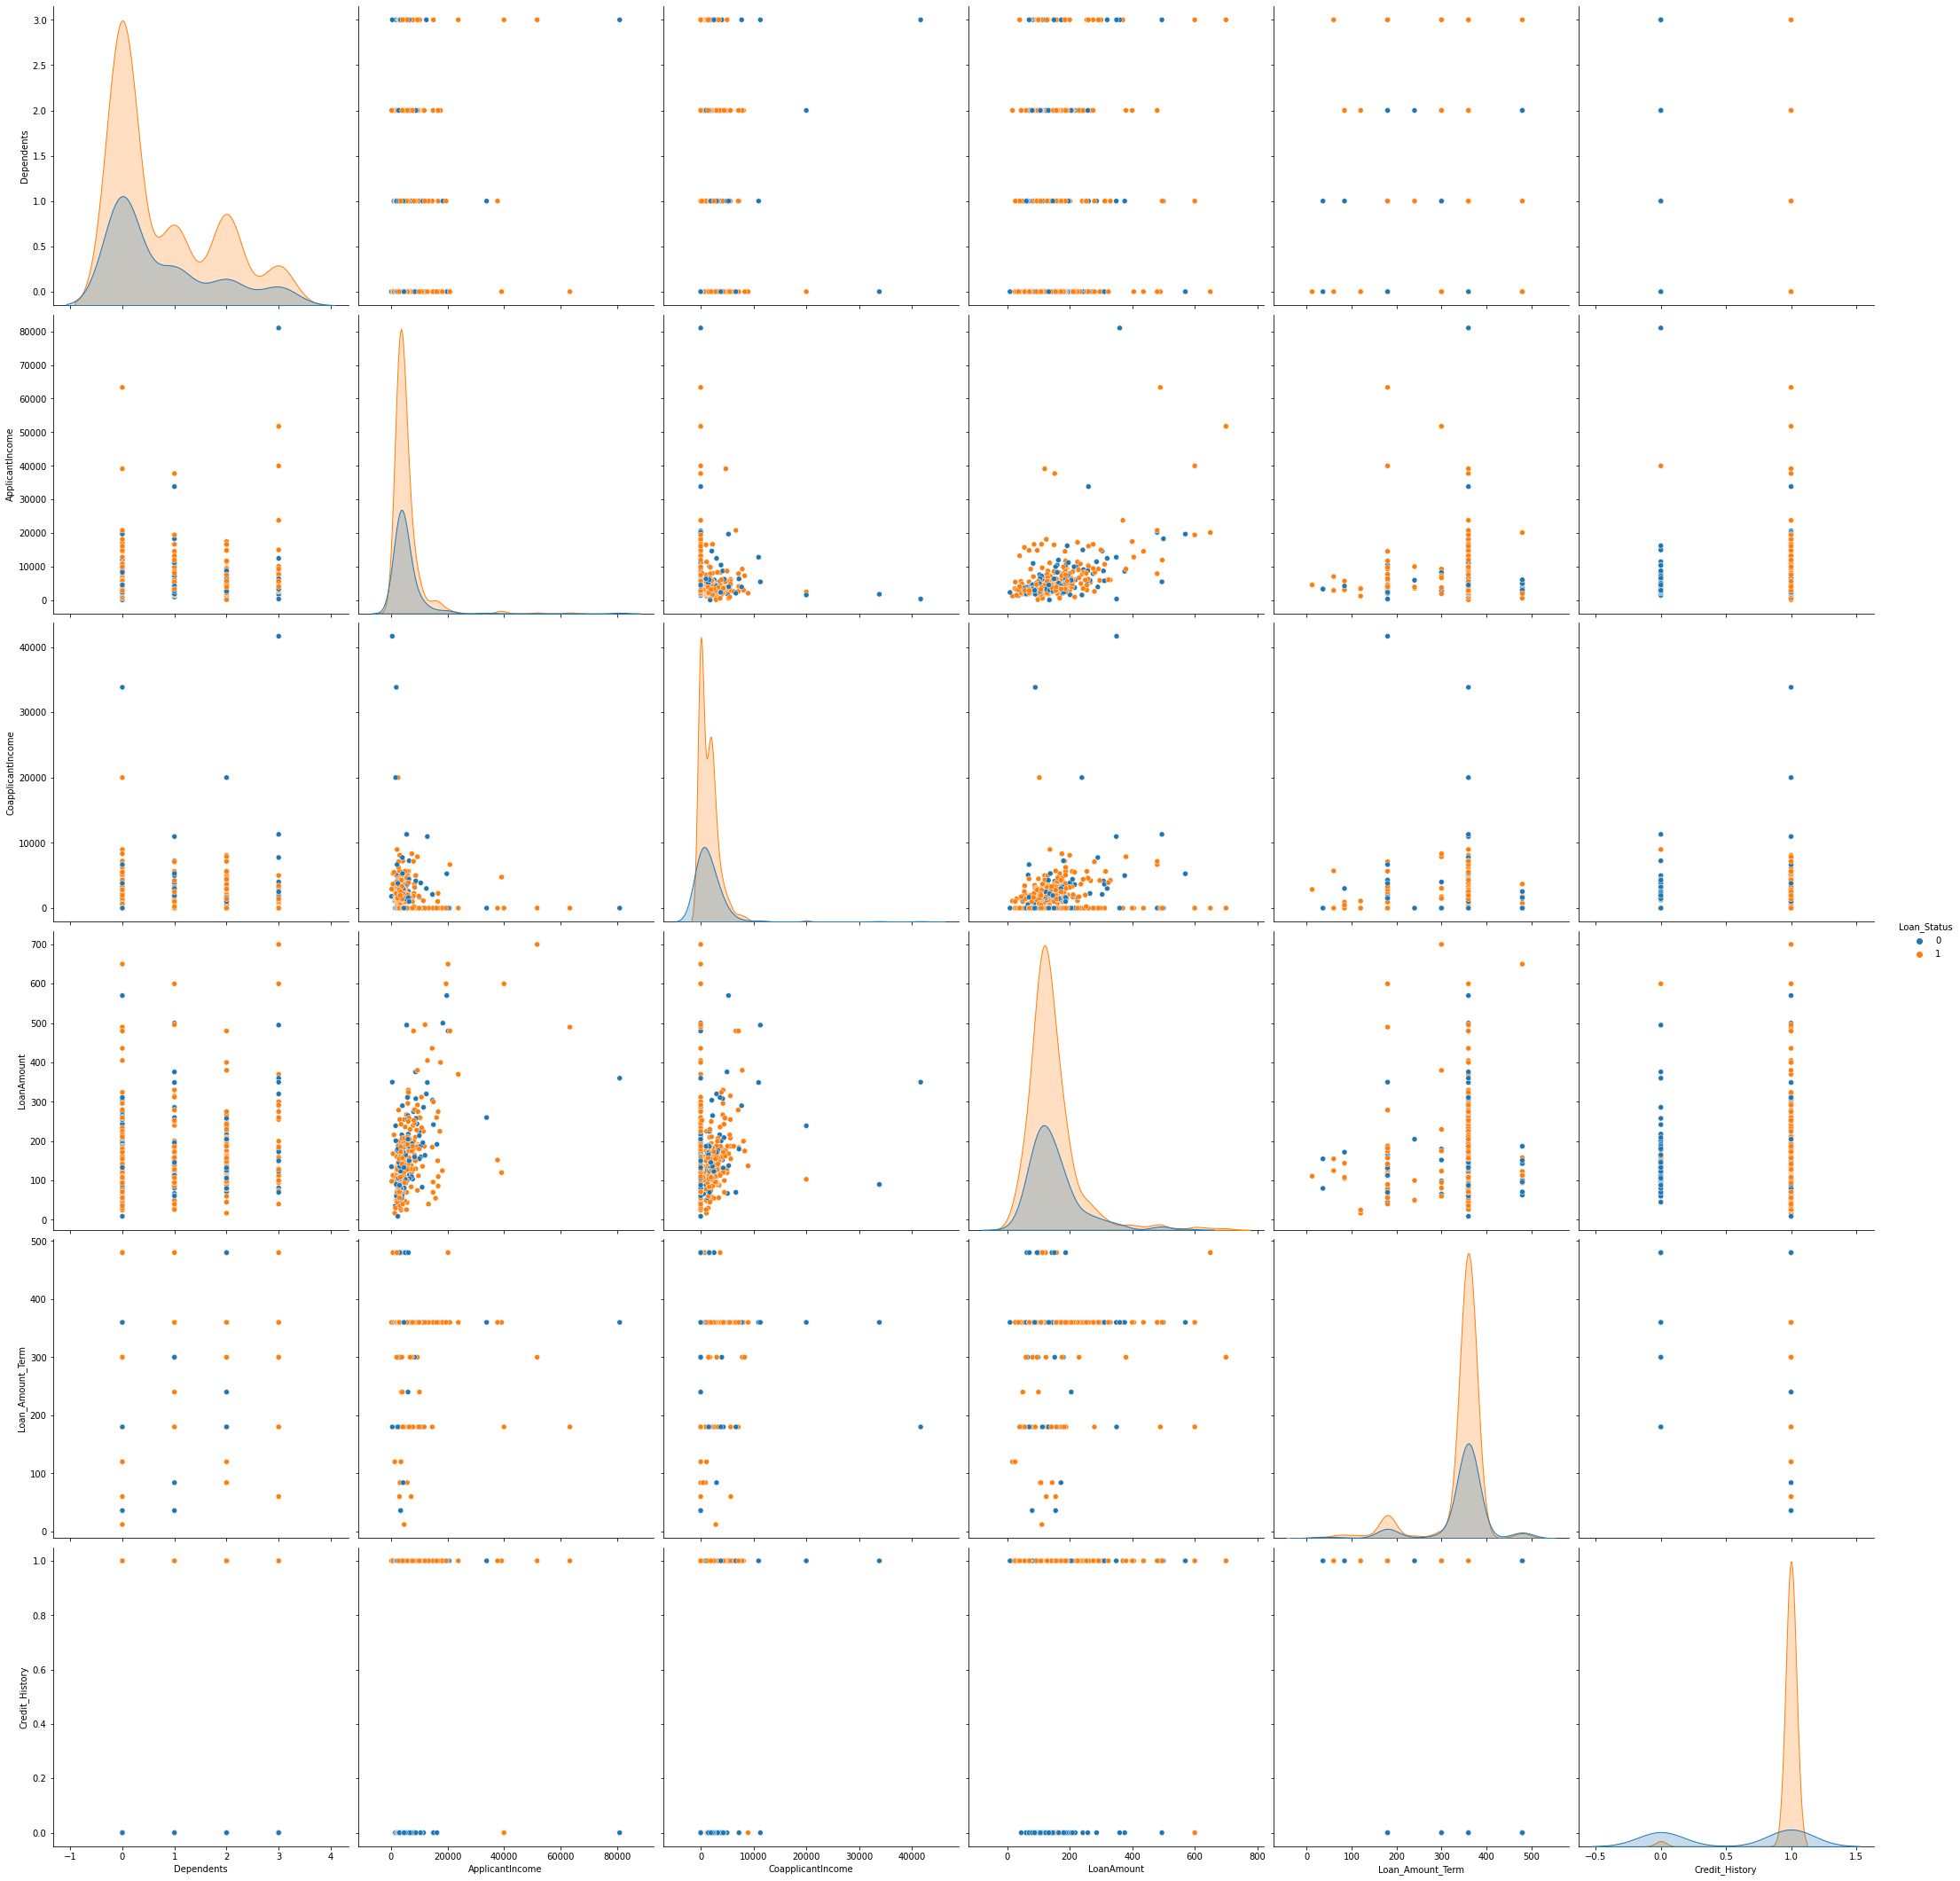

In [17]:
sns.pairplot(df,hue='Loan_Status',size=5)

- Among numeric columns, credit history has the best correlation with Target.
## Encoding

In [18]:
df.tail(7)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
607,Male,Yes,2.0,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,1
608,Male,Yes,0.0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,1
609,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1
613,Female,No,0.0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,0


In [19]:
df.replace({"Gender":{'Female':0,'Male':1},"Married":{'Yes':1,'No':0},"Education":{'Not Graduate':0,'Graduate':1},
            "Self_Employed":{'No':0,'Yes':1},"Property_Area":{'Rural':0,'Semiurban':1,'Urban':2}},inplace=True)

In [20]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


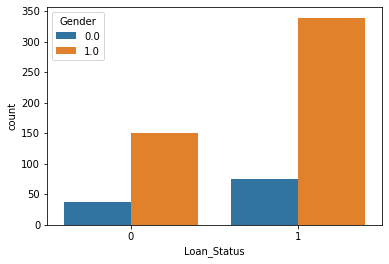

In [21]:
sns.countplot(data = df, x='Loan_Status',hue='Gender')

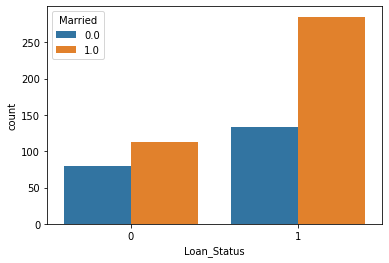

In [22]:
sns.countplot(data = df, x='Loan_Status',hue='Married')

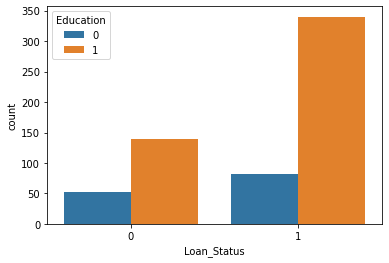

In [23]:
sns.countplot(data = df, x='Loan_Status',hue='Education')

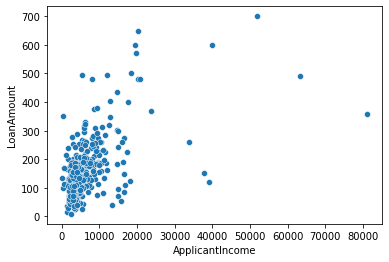

In [24]:
sns.scatterplot(data = df, x='ApplicantIncome',y='LoanAmount')          

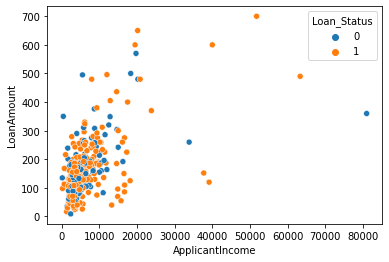

In [25]:
sns.scatterplot(data = df, x='ApplicantIncome',y='LoanAmount',hue='Loan_Status')          

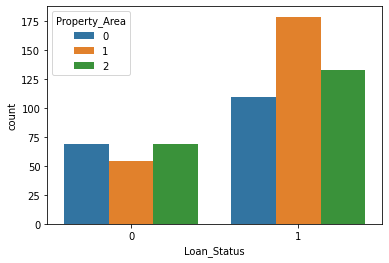

In [26]:
sns.countplot(data = df, x='Loan_Status',hue='Property_Area')

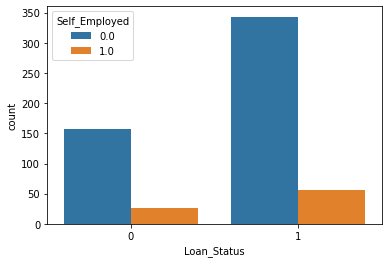

In [27]:
sns.countplot(data = df, x='Loan_Status',hue='Self_Employed')

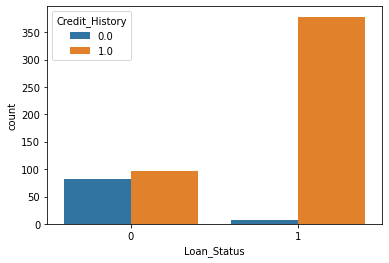

In [28]:
sns.countplot(data = df, x='Loan_Status',hue='Credit_History')

In [29]:
df.corr()['Loan_Status']

Gender               0.019857
Married              0.089280
Dependents           0.006781
Education            0.085884
Self_Employed       -0.002303
ApplicantIncome     -0.004710
CoapplicantIncome   -0.059187
LoanAmount          -0.037318
Loan_Amount_Term    -0.021268
Credit_History       0.561678
Property_Area        0.032112
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

In [30]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- Now, we have all columns in numeric datatype.
## Handling Null Values:
1. Gender, married, dependent, loan amount term columns has less than 3% null values so we can delete the rows having null values.
2. Loan_ID, Education, Applicant Income, Coapplicant income, property area, loan_status are the columns with No null values.
3. We will have to fill null values of columns: Self_Employed, Loan Amount, Credit_History. As there are 5.21,3.58,8.14 percent null values accordingly.


In [31]:
#Dropping null rows of column Gender
df[df['Gender'].isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,NaN,1.0,2.0,0,0.0,3365,1917.0,112.0,360.0,0.0,0,0
126,NaN,1.0,3.0,1,0.0,23803,0.0,370.0,360.0,1.0,0,1
171,NaN,1.0,3.0,1,0.0,51763,0.0,700.0,300.0,1.0,2,1
188,NaN,1.0,0.0,1,1.0,674,5296.0,168.0,360.0,1.0,0,1
314,NaN,1.0,0.0,1,0.0,2473,1843.0,159.0,360.0,1.0,0,0
334,NaN,1.0,1.0,1,1.0,9833,1833.0,182.0,180.0,1.0,2,1
460,NaN,1.0,0.0,1,1.0,2083,4083.0,160.0,360.0,NaN,1,1
467,NaN,1.0,0.0,1,0.0,16692,0.0,110.0,360.0,1.0,1,1
477,NaN,1.0,2.0,1,0.0,2873,1872.0,132.0,360.0,0.0,1,0
507,NaN,0.0,0.0,1,0.0,3583,0.0,96.0,360.0,1.0,2,0


In [32]:
df.drop([23,126,171,188,314,334,460,467,477,507,576,588,592],inplace=True)

In [33]:
df['Gender'].isna().sum()

0

In [34]:
#Dropping null rows of column married
df[df['Married'].isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,1.0,NaN,NaN,1,0.0,3816,754.0,160.0,360.0,1.0,2,1
228,1.0,NaN,NaN,1,0.0,4758,0.0,158.0,480.0,1.0,1,1
435,0.0,NaN,NaN,1,0.0,10047,0.0,NaN,240.0,1.0,1,1


In [35]:
df.drop([104,228,435],inplace=True)

In [36]:
df['Married'].isna().sum()

0

In [37]:
#Dropping null rows of column Dependents           
df[df['Dependents'].isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,1.0,1.0,NaN,1,0.0,13650,0.0,NaN,360.0,1.0,2,1
120,1.0,1.0,NaN,1,0.0,5667,2667.0,180.0,360.0,1.0,0,1
226,1.0,1.0,NaN,0,1.0,4735,0.0,138.0,360.0,1.0,2,0
293,0.0,0.0,NaN,1,0.0,5417,0.0,143.0,480.0,0.0,2,0
301,1.0,1.0,NaN,0,0.0,2875,1750.0,105.0,360.0,1.0,1,1
332,1.0,0.0,NaN,1,0.0,2833,0.0,71.0,360.0,1.0,2,1
335,1.0,1.0,NaN,1,1.0,5503,4490.0,70.0,NaN,1.0,1,1
346,1.0,1.0,NaN,0,0.0,3523,3230.0,152.0,360.0,0.0,0,0
355,0.0,0.0,NaN,1,0.0,3813,0.0,116.0,180.0,1.0,2,1
517,1.0,1.0,NaN,0,0.0,3074,1800.0,123.0,360.0,0.0,1,0


In [38]:
df.drop([102,120,226,293,301,332,335,346,355,517,571,597],inplace=True)

In [39]:
df['Dependents'].isna().sum()

0

In [40]:
#Dropping null rows of Loan_Amount_Term                
df[df['Loan_Amount_Term'].isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,1.0,1.0,0.0,1,NaN,2600,3500.0,115.0,NaN,1.0,2,1
36,1.0,1.0,0.0,1,0.0,1828,1330.0,100.0,NaN,0.0,2,0
44,1.0,1.0,0.0,0,1.0,4695,0.0,96.0,NaN,1.0,2,1
45,0.0,0.0,0.0,1,0.0,3410,0.0,88.0,NaN,1.0,2,1
73,1.0,1.0,3.0,0,0.0,4755,0.0,95.0,NaN,0.0,1,0
112,1.0,1.0,0.0,0,0.0,3572,4114.0,152.0,NaN,0.0,0,0
165,1.0,1.0,0.0,1,0.0,3707,3166.0,182.0,NaN,1.0,0,1
197,0.0,0.0,0.0,0,0.0,1907,2365.0,120.0,NaN,1.0,2,1
223,1.0,1.0,0.0,1,0.0,7578,1010.0,175.0,NaN,1.0,1,1
232,1.0,0.0,0.0,0,0.0,3189,2598.0,120.0,NaN,1.0,0,1


In [41]:
df.drop([19,36,44,45,73,112,165,197,223,232,367,421,423],inplace=True)

In [42]:
df['Loan_Amount_Term'].isna().sum()

0

#### Filling null values of column LoanAmount by mean



In [43]:
#Imputing column LoanAmount
df['LoanAmount'].isna().sum()

20

In [44]:
LAmean = df['LoanAmount'].mean()
df['LoanAmount'].fillna(LAmean, inplace=True)

In [45]:
df['LoanAmount'].isna().sum()

0

In [46]:
df = df.dropna(axis=0, subset=['Self_Employed'])

In [47]:
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

- Credit_History has highest corr value with target.
- There are 8.14 % null values in the column, so will should fill null values instead of dropping rows. Also, this column has categorical data.
- Trying to fill null values by predicting them using KNN model.
#### Filling null values of Crdit_History column by prediction using KNN algorithm

In [48]:
# Created new dataframe without null values of credit_history
df_CRHS = df.dropna(axis=0, subset=['Credit_History'])

In [49]:
df_CRHS.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [50]:
# Seperated Credit_History column for making predictions
x_crhs = df_CRHS.iloc[:,[0,1,2,3,4,5,6,7,8,10,11]]
y_crhs = df_CRHS.iloc[:,9]

In [51]:
from sklearn.model_selection import train_test_split
x_ctrain, x_ctest, y_ctrain, y_ctest = train_test_split(x_crhs,y_crhs, test_size = 0.3, random_state=1)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn_c = KNeighborsClassifier(n_neighbors=9)
knn_c.fit(x_ctrain,y_ctrain)
y_cpred = knn_c.predict(x_ctest)  

from sklearn.metrics import accuracy_score,classification_report
print(f"Accuracy Score:{accuracy_score(y_ctest,y_cpred)}\n\n")
print(classification_report(y_ctest,y_cpred))

Accuracy Score:0.8466666666666667


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        23
         1.0       0.85      1.00      0.92       127

    accuracy                           0.85       150
   macro avg       0.42      0.50      0.46       150
weighted avg       0.72      0.85      0.78       150



In [53]:
#Predicting Null values of credit_history
df_CRHS_new = df.iloc[:,:]

In [54]:
df_CRHS_new.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [55]:
df_CRHS_new_test = df_CRHS_new[df_CRHS_new['Credit_History'].isna()]

In [56]:
x_df_CRHS_test = df_CRHS_new_test.iloc[:,[0,1,2,3,4,5,6,7,8,10,11]]
y_df_CRHS_test = pd.DataFrame(df_CRHS_new_test.iloc[:,9])

In [57]:
#Predicted NULL Values of Credit history
y_df_CRHS_pred = knn_c.predict(x_df_CRHS_test)

In [58]:
y_df_CRHS_test['Credit_History'] = y_df_CRHS_pred

In [59]:
df_CRHS_fna = pd.concat( [x_df_CRHS_test, y_df_CRHS_test] , axis=1) #this is the dataset of Credit History without null values

In [60]:
x_df_CRHS_test.shape

(43, 11)

In [61]:
y_df_CRHS_test.shape

(43, 1)

In [62]:
df.shape

(542, 12)

- Splitting dataframe

In [63]:
df_null = df[df['Credit_History'].isna()]

In [64]:
mask = df.notnull() # this gives boolean values w.r.t null

df_all = df.where(mask).dropna()

In [65]:
df_new = pd.concat([df_all, df_CRHS_fna], axis=0)

In [66]:
df_new.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### - Finally we got dataframe without null values

In [67]:
# Splitting data for training and testing
x = df_new.iloc[:,:-1]
y = df_new.iloc[:,-1]

In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [69]:
xtrain, xtest, ytrain, ytest = train_test_split (x, y, test_size=0.25, random_state=1)

## Applying ANN on dataset

In [70]:
#step1: Initialise ANN model
ann = Sequential()

#step2: Add layers
ann.add (Dense (units = 12, activation ='relu')) #hidden layer: relu=rectified linear unit
ann.add (Dense (units = 12, activation ='relu'))
ann.add (Dense (units = 1, activation ='sigmoid')) #output layer:

#step3: Establish connection between layers
ann.compile (optimizer ='adam', loss='binary_crossentropy') #adam=advance version of gradient descent

#step4: train the model
ann.fit (xtrain, ytrain, batch_size = 10, epochs = 100,validation_data= (xtest, ytest))

Epoch 1/100
41/41 [==============================] - 1s 6ms/step - loss: 0.7656 - val_loss: 0.6959
Epoch 2/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6456 - val_loss: 0.6807
Epoch 3/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5948 - val_loss: 0.6856
Epoch 4/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5676 - val_loss: 0.6859
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5484 - val_loss: 0.6750
Epoch 6/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5291 - val_loss: 0.6633
Epoch 7/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5123 - val_loss: 0.6600
Epoch 8/100
41/41 [==============================] - 0s 2ms/step - loss: 0.4991 - val_loss: 0.6631
Epoch 9/100
41/41 [==============================] - 0s 3ms/step - loss: 0.4860 - val_loss: 0.6539
Epoch 10/100
41/41 [==============================] - 0s 3ms/step - loss: 0.4770 - val_loss: 0.6484
Epoch 11/

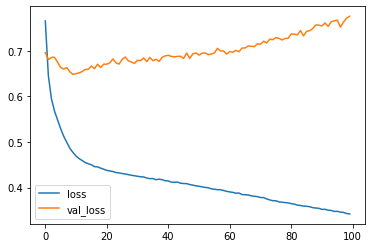

In [71]:
lossdf = pd.DataFrame(ann.history.history)
lossdf.plot()

In [72]:
#step5: make predictions
ypred = ann.predict(xtest)

#step6: set the threshold
ypred = ypred > 0.5

In [73]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      0.40      0.56        55
           1       0.71      0.99      0.82        81

    accuracy                           0.75       136
   macro avg       0.83      0.69      0.69       136
weighted avg       0.81      0.75      0.72       136



In [74]:
df_new['Loan_Status'].value_counts()

1    376
0    166
Name: Loan_Status, dtype: int64

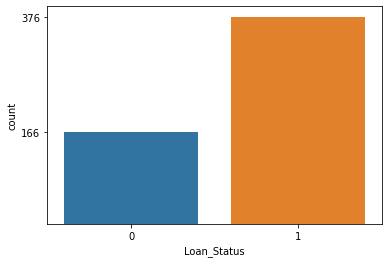

In [75]:
sns.countplot(data=df,x="Loan_Status")
c=df["Loan_Status"].value_counts()
plt.yticks(c)
plt.show()

In [76]:
from imblearn.over_sampling import RandomOverSampler

In [77]:
#apply sampling technique 
#Oversampler
#create object of  RandomOverSampler() class
ros = RandomOverSampler() 
#increase records of minority class here yes is minority class 

In [78]:
#apply randomoversampling for balance
xtrain1,ytrain1=ros.fit_resample(xtrain,ytrain)

In [79]:
pd.Series(ytrain1).value_counts()

1    295
0    295
Name: Loan_Status, dtype: int64

In [80]:
#step1: Initialise ANN model
ann = Sequential()

#step2: Add layers
ann.add (Dense (units = 5, activation ='relu')) #hidden layer: relu=rectified linear unit
ann.add (Dense (units = 5, activation ='relu'))
ann.add (Dense (units = 1, activation ='sigmoid')) #output layer:

#step3: Establish connection between layers
ann.compile (optimizer ='adam', loss='binary_crossentropy') #adam=advance version of gradient descent

#step4: train the model
ann.fit (xtrain1, ytrain1, batch_size = 10, epochs = 100,validation_data=(xtest,ytest))

Epoch 1/100
59/59 [==============================] - 1s 5ms/step - loss: 0.9727 - val_loss: 0.8475
Epoch 2/100
59/59 [==============================] - 0s 2ms/step - loss: 0.8383 - val_loss: 0.7848
Epoch 3/100
59/59 [==============================] - 0s 2ms/step - loss: 0.7703 - val_loss: 0.7448
Epoch 4/100
59/59 [==============================] - 0s 2ms/step - loss: 0.7321 - val_loss: 0.7258
Epoch 5/100
59/59 [==============================] - 0s 2ms/step - loss: 0.7120 - val_loss: 0.7137
Epoch 6/100
59/59 [==============================] - 0s 2ms/step - loss: 0.7001 - val_loss: 0.7053
Epoch 7/100
59/59 [==============================] - 0s 2ms/step - loss: 0.6918 - val_loss: 0.6990
Epoch 8/100
59/59 [==============================] - 0s 2ms/step - loss: 0.6848 - val_loss: 0.6938
Epoch 9/100
59/59 [==============================] - 0s 2ms/step - loss: 0.6783 - val_loss: 0.6886
Epoch 10/100
59/59 [==============================] - 0s 2ms/step - loss: 0.6716 - val_loss: 0.6836
Epoch 11/

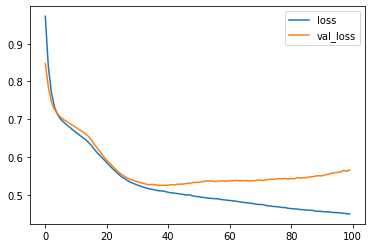

In [81]:
lossdf = pd.DataFrame(ann.history.history)
lossdf.plot()

In [82]:
#step5: make predictions
ypred = ann.predict(xtest)

#step6: set the threshold
ypred = ypred > 0.5

In [83]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.51      0.65        55
           1       0.74      0.96      0.84        81

    accuracy                           0.78       136
   macro avg       0.82      0.74      0.74       136
weighted avg       0.81      0.78      0.76       136



## Using Earlystop

In [84]:
from tensorflow.keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience= 25)
ann.fit(xtrain1, ytrain1, epochs=300,  validation_data=(xtest,ytest),callbacks=[earlystop])

Epoch 1/300
19/19 [==============================] - 0s 6ms/step - loss: 0.4464 - val_loss: 0.5652
Epoch 2/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4461 - val_loss: 0.5654
Epoch 3/300
19/19 [==============================] - 0s 4ms/step - loss: 0.4455 - val_loss: 0.5661
Epoch 4/300
19/19 [==============================] - 0s 5ms/step - loss: 0.4453 - val_loss: 0.5669
Epoch 5/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4451 - val_loss: 0.5675
Epoch 6/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4450 - val_loss: 0.5682
Epoch 7/300
19/19 [==============================] - 0s 4ms/step - loss: 0.4444 - val_loss: 0.5687
Epoch 8/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4445 - val_loss: 0.5698
Epoch 9/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4439 - val_loss: 0.5702
Epoch 10/300
19/19 [==============================] - 0s 4ms/step - loss: 0.4435 - val_loss: 0.5706
Epoch 11/

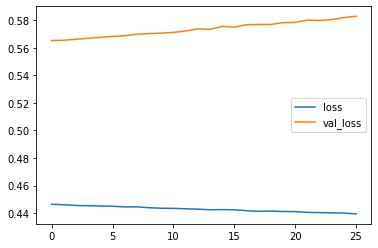

In [85]:
lossdf = pd.DataFrame(ann.history.history)
lossdf.plot()

In [86]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.51      0.65        55
           1       0.74      0.96      0.84        81

    accuracy                           0.78       136
   macro avg       0.82      0.74      0.74       136
weighted avg       0.81      0.78      0.76       136



In [87]:
from tensorflow.keras.layers import Dropout

In [88]:
#step1: Initialise ANN model
ann = Sequential()

#step2: Add layers
ann.add (Dense (units = 5, activation ='relu')) #hidden layer: relu=rectified linear unit
ann.add(Dropout(rate=0.2))

ann.add (Dense (units = 5, activation ='relu'))
ann.add(Dropout(rate=0.2))

ann.add (Dense (units = 5, activation ='relu'))
ann.add(Dropout(rate=0.2))

ann.add (Dense (units = 5, activation ='relu'))
ann.add(Dropout(rate=0.2))


ann.add (Dense (units = 1, activation ='sigmoid')) #output layer:

#step3: Establish connection between layers
ann.compile (optimizer ='rmsprop', loss='binary_crossentropy') #adam=advance version of gradient descent

#step4: train the model
ann.fit (xtrain1, ytrain1, batch_size = 5, epochs = 50,validation_data=(xtest,ytest))

Epoch 1/50
118/118 [==============================] - 1s 4ms/step - loss: 0.7159 - val_loss: 0.6885
Epoch 2/50
118/118 [==============================] - 0s 2ms/step - loss: 0.7051 - val_loss: 0.6900
Epoch 3/50
118/118 [==============================] - 0s 2ms/step - loss: 0.7026 - val_loss: 0.6911
Epoch 4/50
118/118 [==============================] - 0s 2ms/step - loss: 0.6916 - val_loss: 0.6892
Epoch 5/50
118/118 [==============================] - 0s 2ms/step - loss: 0.6958 - val_loss: 0.6869
Epoch 6/50
118/118 [==============================] - 0s 2ms/step - loss: 0.6892 - val_loss: 0.6853
Epoch 7/50
118/118 [==============================] - 0s 2ms/step - loss: 0.6904 - val_loss: 0.6821
Epoch 8/50
118/118 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6789
Epoch 9/50
118/118 [==============================] - 0s 2ms/step - loss: 0.6786 - val_loss: 0.6724
Epoch 10/50
118/118 [==============================] - 0s 2ms/step - loss: 0.6592 - val_loss: 0.6589

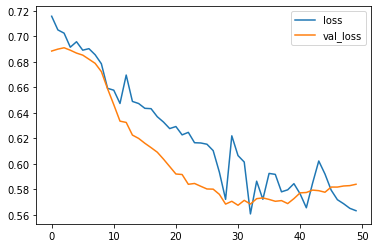

In [89]:
lossdf = pd.DataFrame(ann.history.history)
lossdf.plot()

In [90]:
#step5: make predictions
ypred = ann.predict(xtest)

#step6: set the threshold
ypred = ypred > 0.5

In [91]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.93      0.45      0.61        55
           1       0.72      0.98      0.83        81

    accuracy                           0.76       136
   macro avg       0.83      0.71      0.72       136
weighted avg       0.81      0.76      0.74       136



In [92]:
#step1: Initialise ANN model
ann = Sequential()

#step2: Add layers
ann.add (Dense (units = 12, activation ='relu')) #hidden layer: relu=rectified linear unit
ann.add(Dropout(rate=0.2))

ann.add (Dense (units = 12, activation ='relu'))
ann.add(Dropout(rate=0.2))

ann.add (Dense (units = 6, activation ='relu'))
ann.add(Dropout(rate=0.2))

ann.add (Dense (units = 6, activation ='relu'))
ann.add(Dropout(rate=0.2))


ann.add (Dense (units = 1, activation ='sigmoid')) #output layer:

#step3: Establish connection between layers
ann.compile (optimizer ='adam', loss='binary_crossentropy') #adam=advance version of gradient descent

#step4: train the model
ann.fit (xtrain1, ytrain1, batch_size = 10, epochs = 100,validation_data=(xtest,ytest))

Epoch 1/100
59/59 [==============================] - 1s 5ms/step - loss: 0.6996 - val_loss: 0.7034
Epoch 2/100
59/59 [==============================] - 0s 2ms/step - loss: 0.6869 - val_loss: 0.6966
Epoch 3/100
59/59 [==============================] - 0s 2ms/step - loss: 0.6927 - val_loss: 0.6896
Epoch 4/100
59/59 [==============================] - 0s 2ms/step - loss: 0.6869 - val_loss: 0.6857
Epoch 5/100
59/59 [==============================] - 0s 3ms/step - loss: 0.6842 - val_loss: 0.6772
Epoch 6/100
59/59 [==============================] - 0s 3ms/step - loss: 0.6710 - val_loss: 0.6636
Epoch 7/100
59/59 [==============================] - 0s 2ms/step - loss: 0.6618 - val_loss: 0.6471
Epoch 8/100
59/59 [==============================] - 0s 2ms/step - loss: 0.6479 - val_loss: 0.6267
Epoch 9/100
59/59 [==============================] - 0s 2ms/step - loss: 0.6329 - val_loss: 0.6043
Epoch 10/100
59/59 [==============================] - 0s 3ms/step - loss: 0.6233 - val_loss: 0.5866
Epoch 11/

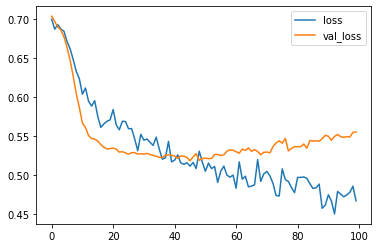

In [93]:
lossdf = pd.DataFrame(ann.history.history)
lossdf.plot()

In [94]:
#step5: make predictions
ypred = ann.predict(xtest)

#step6: set the threshold
ypred = ypred > 0.5

In [95]:
ypred[0]

array([ True])

In [96]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.79      0.47      0.59        55
           1       0.72      0.91      0.80        81

    accuracy                           0.74       136
   macro avg       0.75      0.69      0.70       136
weighted avg       0.75      0.74      0.72       136



## Predicting for Observations taken from Users:

In [97]:
Gender = float(input("Type Your Gender\nType'0' for female & '1' for male:"))
Married = float(input("\nAre you Married?\nType '1' if yes else type'0':"))
Dependents = float(input("\nHow many family members are dependent upon you? (Maximum 3):"))
Education = int(input("\nAre you graduate?\nType '1' if you are graduate else type'0':"))
Self_Employed = float(input("\nAre you self employed?\nType '1' if yes else type'0':"))
ApplicantIncome = int(input("\nWhat is your monthly income?:"))
CoapplicantIncome = float(input("\nWhat is your coapplicant's monthly income?:"))
LoanAmount = float(input("\nWhat is the Loan amount?:"))
Loan_Amount_Term = float(input("\nEnter the Loan_Amount_Term:"))
Credit_History = float(input("\nWhat is your Credit_History\n 1 or 0?:"))
Property_Area = int(input("\nWhat is the locality of your property?\ntype '0' for Rural,'1' for Semiurban and '2' for Urban area:"))


newob = sc.transform([[Gender, Married , Dependents, Education, Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area]])
Status = ann.predict(newob)
Status = Status > 0.5
if Status==True:
  print(f"\n\n\nGreat!!!\n\nYour Loan will be approved.")
else:
  print(f"\n\n\nSorry!! \n\nYour Loan wont be approved.")

Type Your Gender
Type'0' for female & '1' for male:0

Are you Married?
Type '1' if yes else type'0':1

How many family members are dependent upon you? (Maximum 3):2

Are you graduate?
Type '1' if you are graduate else type'0':1

Are you self employed?
Type '1' if yes else type'0':1

What is your monthly income?:12345

What is your coapplicant's monthly income?:155555

What is the Loan amount?:1234

Enter the Loan_Amount_Term:360

What is your Credit_History
 1 or 0?:1

What is the locality of your property?
type '0' for Rural,'1' for Semiurban and '2' for Urban area:1



Great!!!

Your Loan will be approved.
